In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
filename = 'poisson_results.csv'
df = pd.read_csv(filename)
df.head()

,compute_type,num_workers,batch_size,experiment_type,arrival_rate,num_requests,total_time,successful_requests,average_time_per_request,throughput,average_latency,min_latency,max_latency,latency_90,latency_95,latency_99,model_id
0,default,1,2,poisson,0.833299,120,147.532129,120,1.229434,0.813382,7.148094,2.194585,14.416669,12.333717,13.335617,14.201581,stabilityai/stable-diffusion-2
1,default,1,4,poisson,0.988877,120,129.328773,120,1.077740,0.927868,7.907700,2.770430,14.790639,11.141152,12.246081,13.702458,stabilityai/stable-diffusion-2
2,default,1,8,poisson,1.090055,120,124.531698,120,1.037764,0.963610,12.475711,3.848706,24.165441,20.236301,21.222989,22.048305,stabilityai/stable-diffusion-2
3,default,1,16,poisson,1.140911,120,127.830505,120,1.065254,0.938743,14.658524,4.850316,25.460579,21.381938,23.792340,25.448953,stabilityai/stable-diffusion-2
4,default,1,2,poisson,0.853834,120,143.245263,120,1.193711,0.837724,7.373647,2.195717,14.644674,12.440566,13.083763,14.430815,stabilityai/sd-turbo


In [3]:
df["eff_batch_size"] = df["batch_size"] * df["num_workers"]
df['config'] = df.apply(lambda row: f"{row['compute_type']}-{row['num_workers']}workers", axis=1)


# Poisson Arrival Time

In [4]:
def visualize(model_id):
    fig, ax = plt.subplots()
    sns.barplot(x='eff_batch_size', y='throughput', hue='config', data=df[
        (df['experiment_type'] == 'poisson') &
        (df['model_id'] == model_id)], ax=ax)
    plt.title(f'Throughput vs. Batch Size for Poisson Load, {model_id}')
    plt.xlabel('Effective Batch Size')
    plt.ylabel('Throughput (requests/s)')
    plt.legend(title='Configuration', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()
    
    fig, ax = plt.subplots()
    sns.barplot(x='eff_batch_size', y='average_latency', hue='config', data=df[
        (df['experiment_type'] == 'poisson') &
        (df['model_id'] == model_id)], ax=ax)
    plt.title(f'Latency Avg vs. Batch Size for Poisson Load, {model_id}')
    plt.xlabel('Effective Batch Size')
    plt.ylabel('Latency Avg (requests/s)')
    plt.legend(title='Configuration', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()
    
    fig, ax = plt.subplots()
    sns.barplot(x='eff_batch_size', y='latency_95', hue='config', data=df[
        (df['experiment_type'] == 'poisson') &
        (df['model_id'] == model_id)], ax=ax)
    plt.title(f'Latency 95% vs. Batch Size for Poisson Load, {model_id}')
    plt.xlabel('Effective Batch Size')
    plt.ylabel('Latency 95% (requests/s)')
    plt.legend(title='Configuration', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

def visualize_latency_vs_throughput(model_id):
    fig, ax = plt.subplots(figsize=(10, 6))
    subset = df[(df['model_id'] == model_id) & (df['experiment_type'] == 'poisson')]
    
    # Create a line plot with markers
    sns.lineplot(x='throughput', y='average_latency', hue='config', data=subset, marker='o', ax=ax)
    
    plt.title(f'Latency vs. Throughput for Poisson Load, {model_id}')
    plt.xlabel('Throughput (requests/s)')
    plt.ylabel('Average Latency (ms)')
    plt.legend(title='Configuration', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()


In [5]:
# bs 1: 8214 MB
# bs 2: 12282 MB
# bs 4: 18586 MB
# bs 8: 31074 MB
# mps: + 30 MB

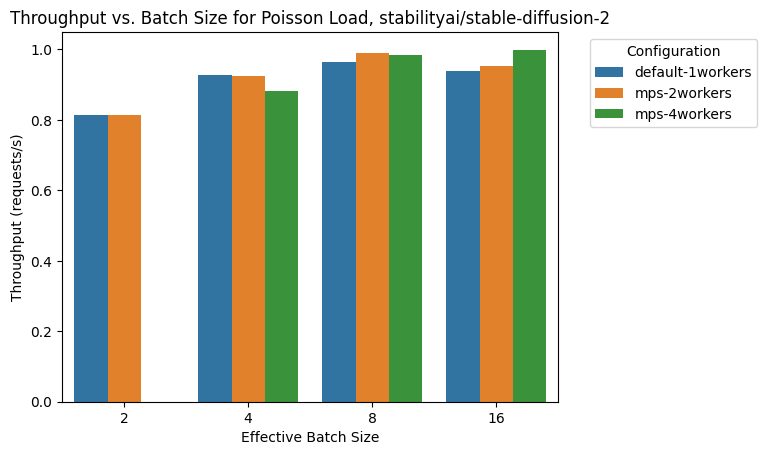

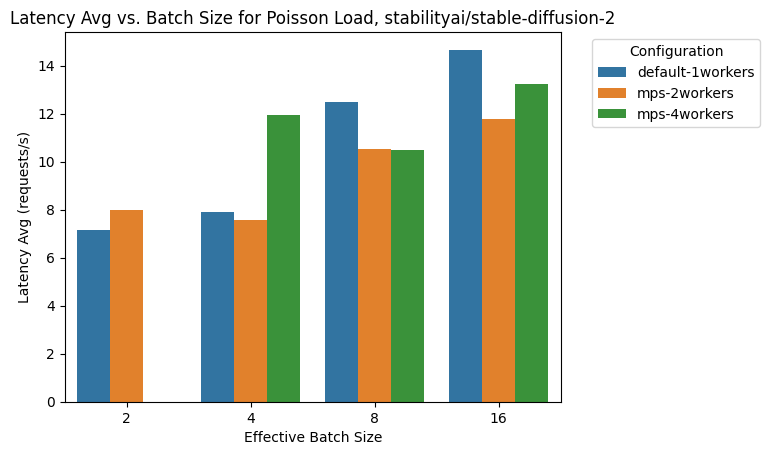

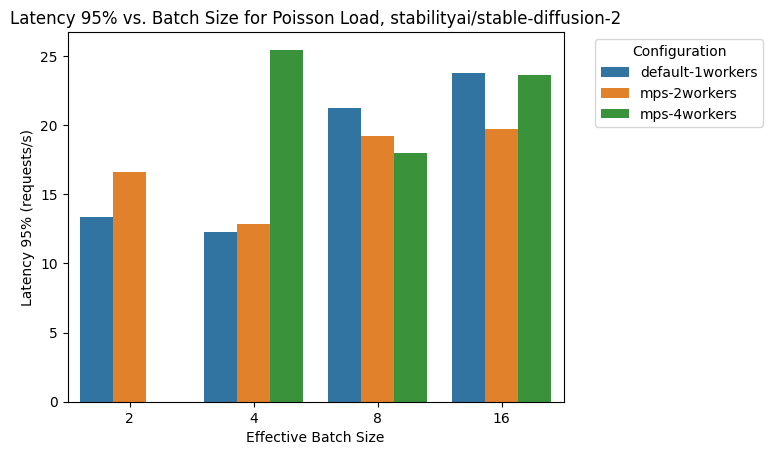

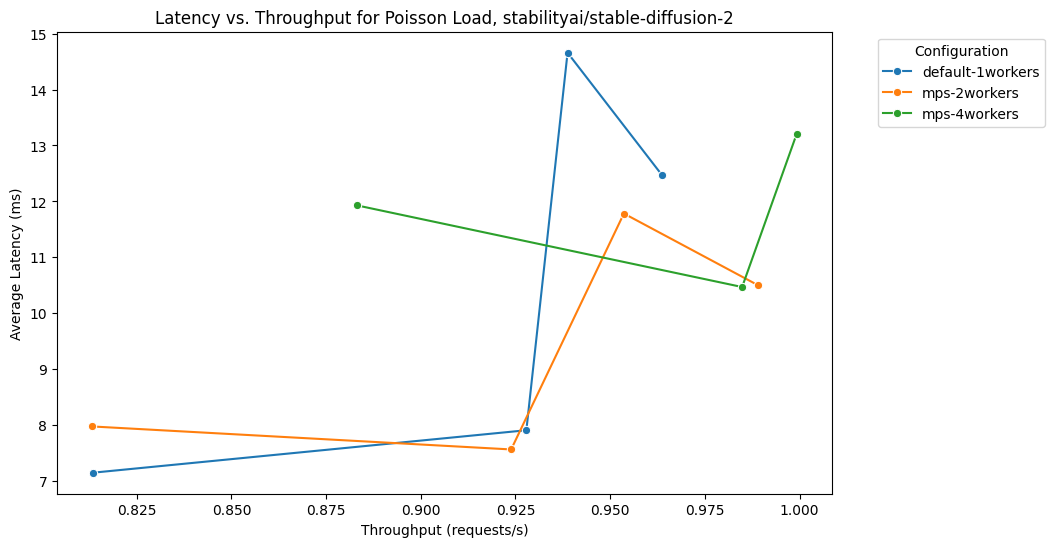

In [6]:
visualize("stabilityai/stable-diffusion-2")
visualize_latency_vs_throughput("stabilityai/stable-diffusion-2")

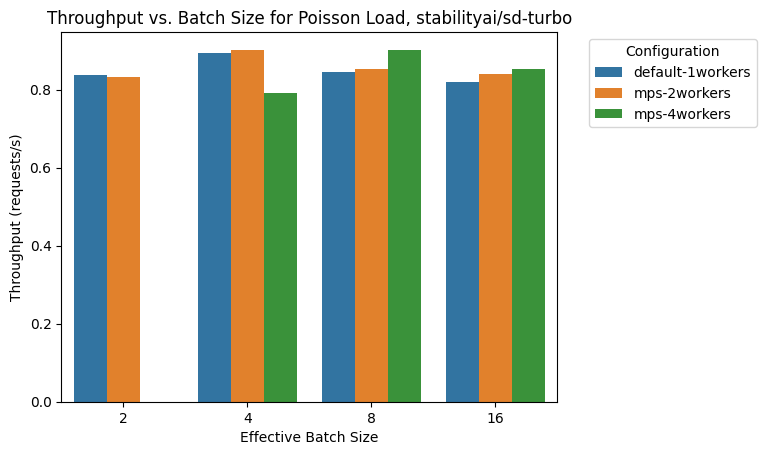

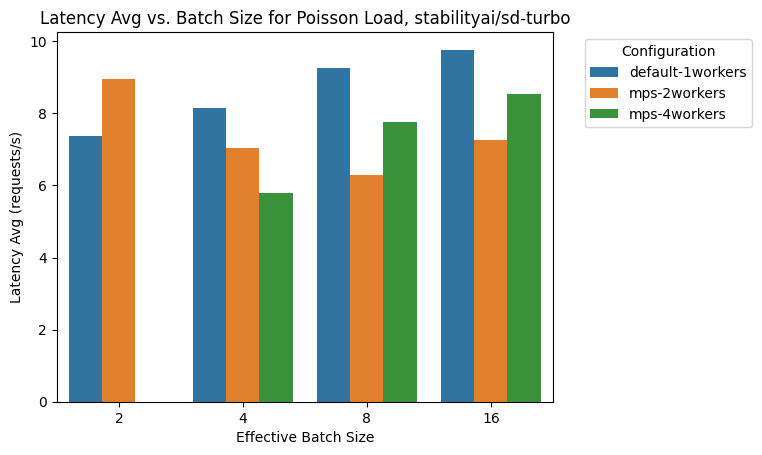

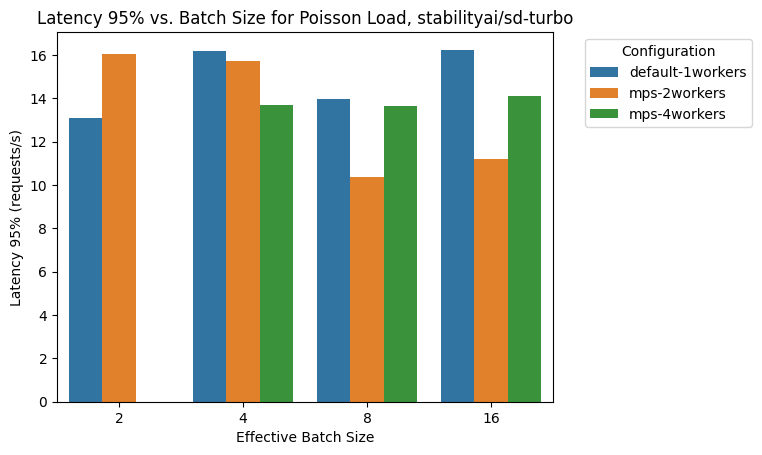

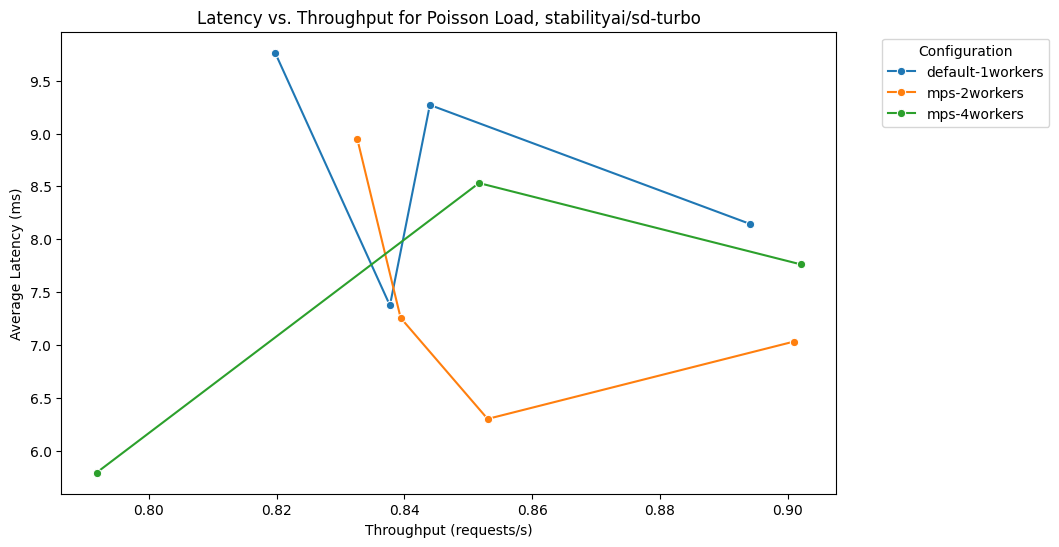

In [7]:
visualize("stabilityai/sd-turbo")
visualize_latency_vs_throughput("stabilityai/sd-turbo")

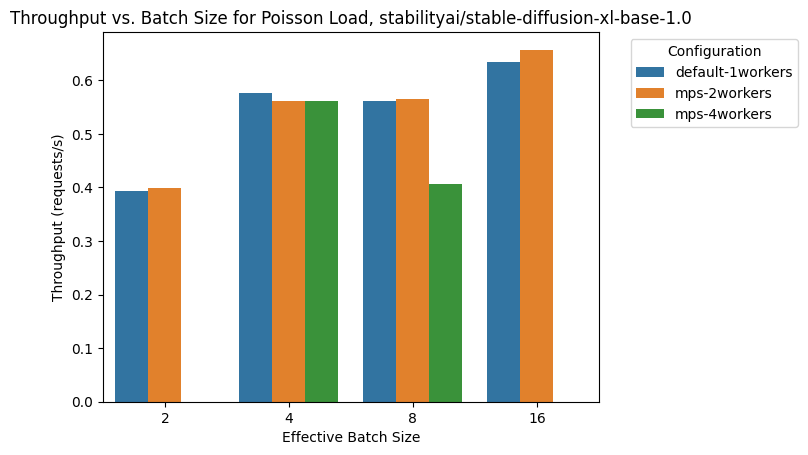

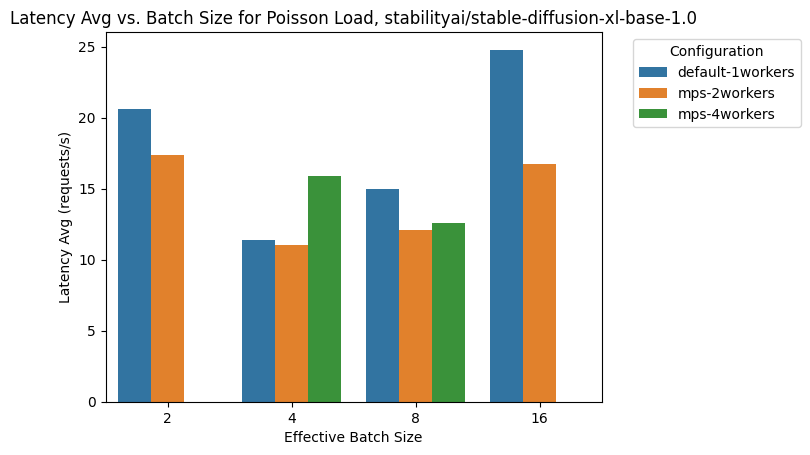

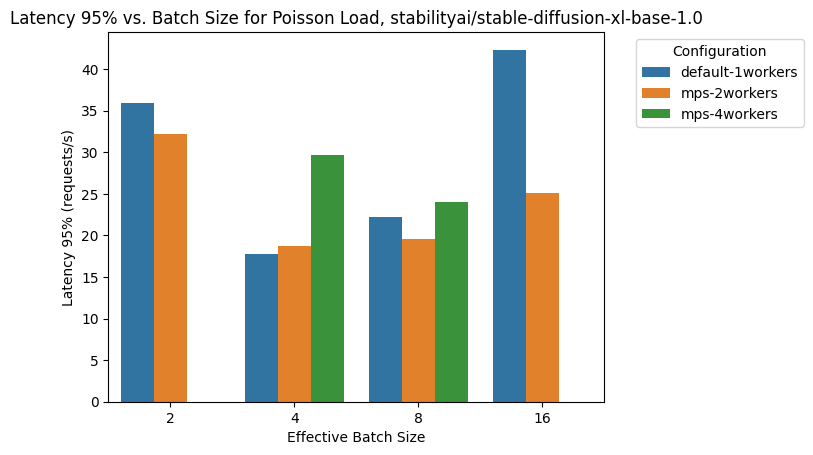

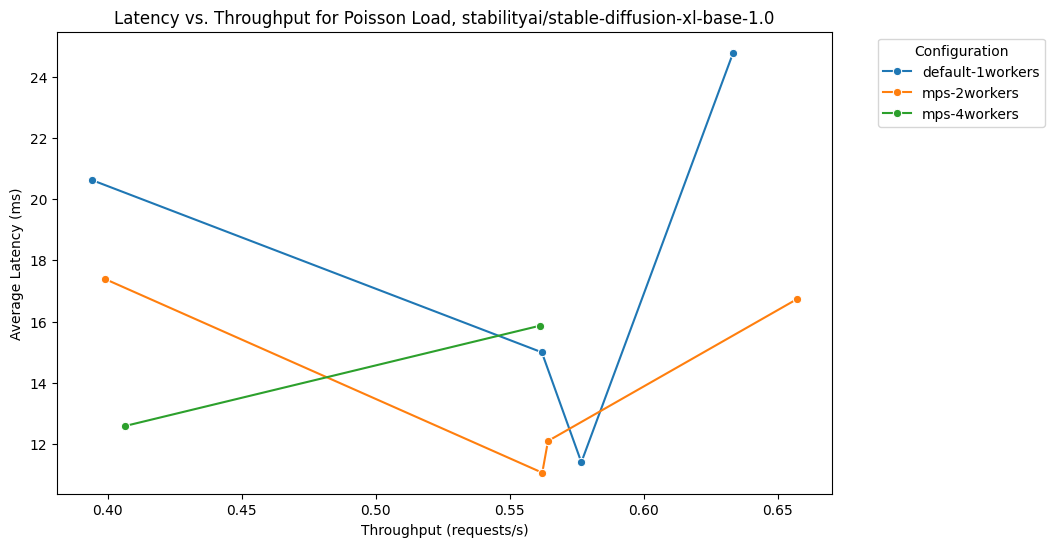

In [8]:
visualize("stabilityai/stable-diffusion-xl-base-1.0")
visualize_latency_vs_throughput("stabilityai/stable-diffusion-xl-base-1.0")

# Constant Arrival Time

In [67]:
filename = 'results.csv'
df = pd.read_csv(filename)
df.head()

,compute_type,num_workers,batch_size,experiment_type,arrival_rate,num_requests,total_time,successful_requests,average_time_per_request,throughput,average_latency,min_latency,max_latency,latency_90,latency_95,latency_99,model_id
0,mps,2,1,constant,0,120,144.005866,120,1.200049,0.833299,72.851390,3.596302,143.878713,130.316808,137.395344,141.857683,stabilityai/stable-diffusion-2
1,mps,2,2,constant,0,120,121.349828,120,1.011249,0.988877,61.839441,5.013196,121.323023,109.276463,116.400326,121.210499,stabilityai/stable-diffusion-2
2,mps,2,4,constant,0,120,110.086172,120,0.917385,1.090055,57.911711,7.849691,110.056937,100.857596,105.952244,107.598969,stabilityai/stable-diffusion-2
3,mps,2,8,constant,0,120,105.179134,120,0.876493,1.140911,58.759903,14.315933,105.150070,96.300549,104.645343,105.023682,stabilityai/stable-diffusion-2
4,default,2,1,constant,0,120,207.835910,120,1.731966,0.577379,106.019842,4.808152,207.719589,189.882222,200.097987,205.580727,stabilityai/stable-diffusion-2


In [68]:
df["eff_batch_size"] = df["batch_size"] * df["num_workers"]
df['config'] = df.apply(lambda row: f"{row['compute_type']}-{row['num_workers']}workers", axis=1)


In [69]:
def visualize(model_id):
    fig, ax = plt.subplots()
    sns.barplot(x='eff_batch_size', y='throughput', hue='config', data=df[
        (df['experiment_type'] == 'constant') &
        (df['model_id'] == model_id)], ax=ax)
    plt.title(f'Throughput vs. Batch Size for Constant Load, {model_id}')
    plt.xlabel('Effective Batch Size')
    plt.ylabel('Throughput (requests/s)')
    plt.legend(title='Configuration', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()
    
    fig, ax = plt.subplots()
    sns.barplot(x='eff_batch_size', y='average_latency', hue='config', data=df[
        (df['experiment_type'] == 'constant') &
        (df['model_id'] == model_id)], ax=ax)
    plt.title(f'Latency Avg vs. Batch Size for Constant Load, {model_id}')
    plt.xlabel('Effective Batch Size')
    plt.ylabel('Latency Avg (requests/s)')
    plt.legend(title='Configuration', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()
    
    # fig, ax = plt.subplots()
    # sns.barplot(x='eff_batch_size', y='latency_99', hue='config', data=df[
    #     (df['experiment_type'] == 'poisson') &
    #     (df['model_id'] == model_id)], ax=ax)
    # plt.title(f'Latency 99% vs. Batch Size for Poisson Load, {model_id}')
    # plt.xlabel('Effective Batch Size')
    # plt.ylabel('Latency 99% (requests/s)')
    # plt.legend(title='Configuration', bbox_to_anchor=(1.05, 1), loc='upper left')
    # plt.show()

def visualize_latency_vs_throughput(model_id):
    fig, ax = plt.subplots(figsize=(10, 6))
    subset = df[(df['model_id'] == model_id) & (df['experiment_type'] == 'constant')]
    
    # Create a line plot with markers
    sns.lineplot(x='throughput', y='average_latency', hue='config', data=subset, marker='o', ax=ax)
    
    plt.title(f'Latency vs. Throughput for Constant Load, {model_id}')
    plt.xlabel('Throughput (requests/s)')
    plt.ylabel('Average Latency (ms)')
    plt.legend(title='Configuration', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()


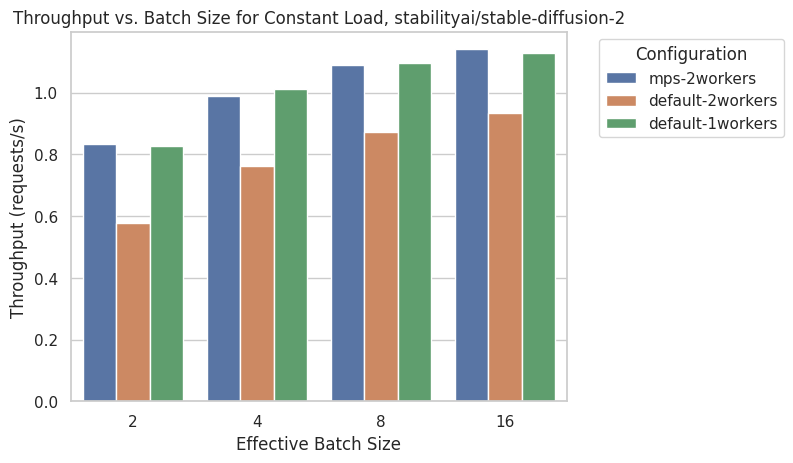

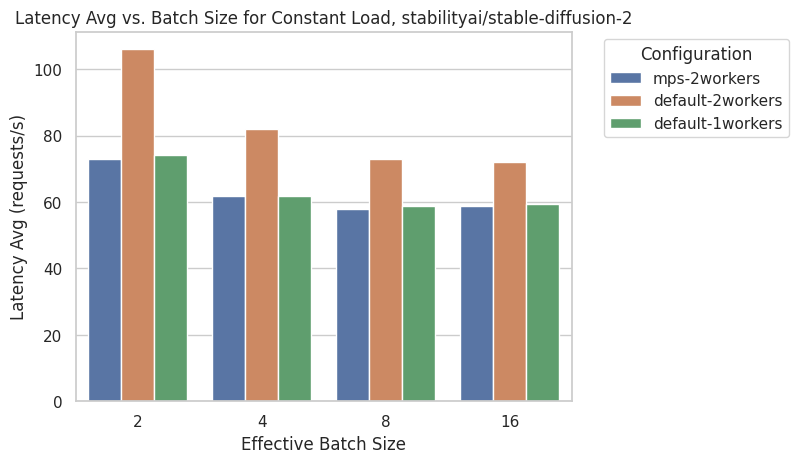

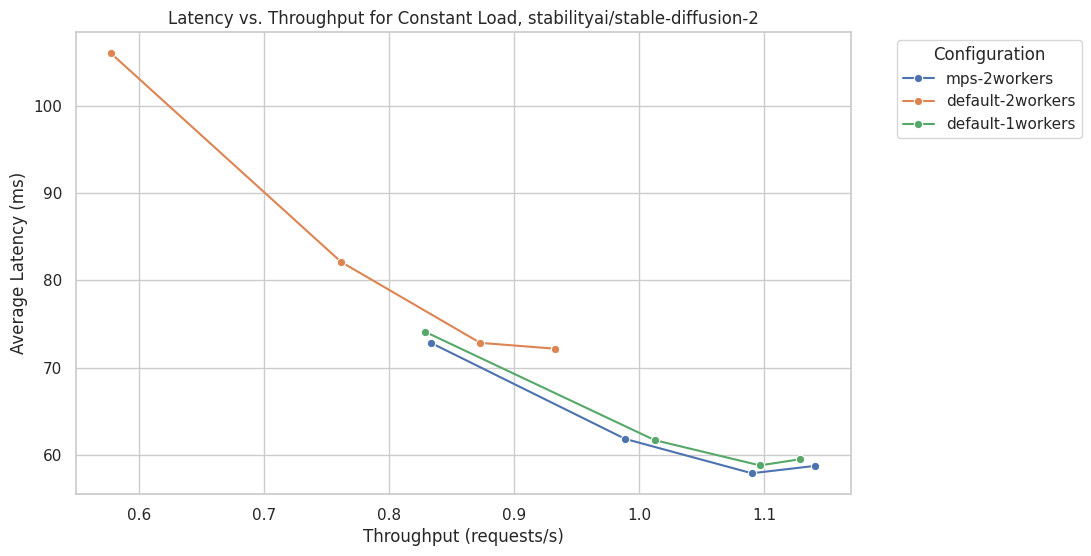

In [70]:
visualize("stabilityai/stable-diffusion-2")
visualize_latency_vs_throughput("stabilityai/stable-diffusion-2")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


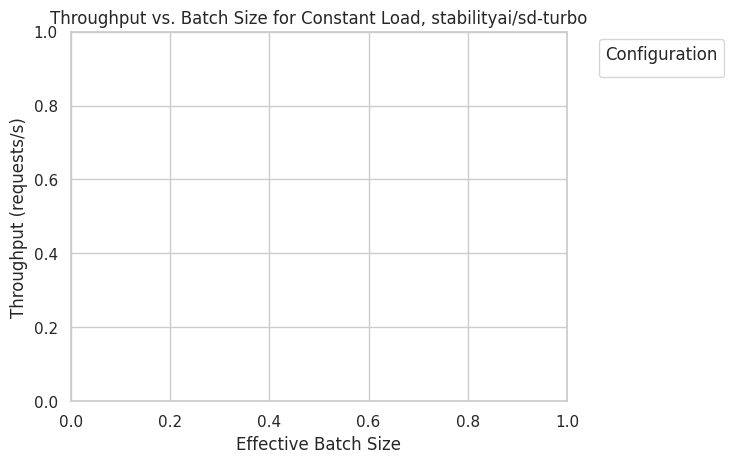

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


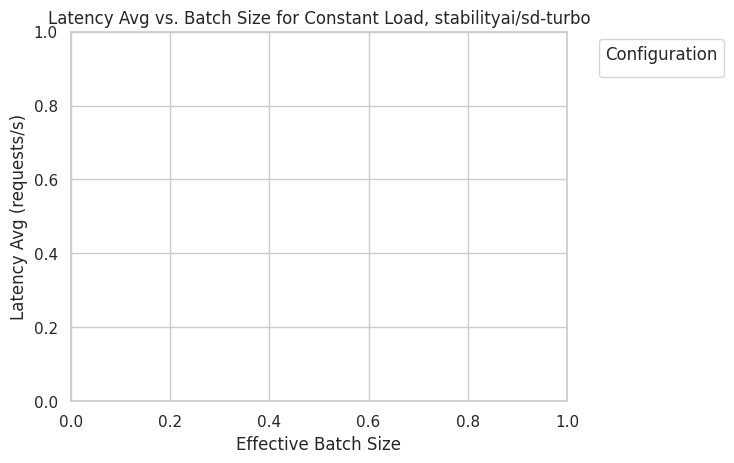

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


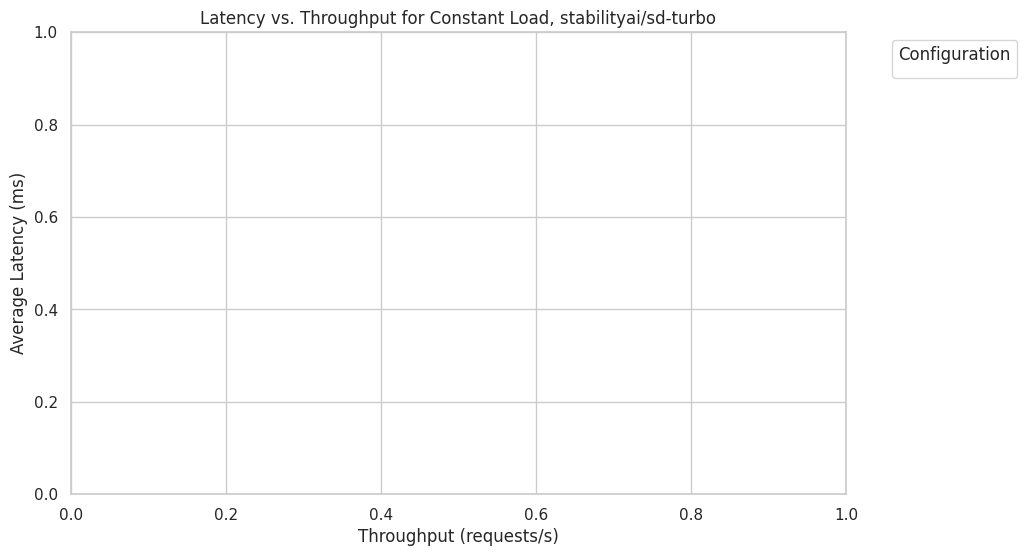

In [71]:
visualize("stabilityai/sd-turbo")
visualize_latency_vs_throughput("stabilityai/sd-turbo")

# Most Recent..

In [36]:
filename = 'selected.csv'
df = pd.read_csv(filename)
df.head()

,compute_type,num_workers,batch_size,experiment_type,arrival_rate,num_requests,total_time,successful_requests,average_time_per_request,throughput,average_latency,min_latency,max_latency,latency_90,latency_95,latency_99,model_id,avg_queue_time,avg_execution_time
0,default,2,1,poisson,0.70,40,28.225318,40,0.705633,1.417167,0.724069,0.667091,0.790671,0.771225,0.787662,0.790671,stabilityai/sd-turbo,0.056010,0.668059
1,default,1,2,poisson,0.70,40,28.379424,40,0.709486,1.409472,1.157519,0.802607,1.524153,1.509847,1.512683,1.524153,stabilityai/sd-turbo,0.360386,0.797133
2,mps,2,1,poisson,0.70,40,28.162579,40,0.704064,1.420324,0.723288,0.668063,0.789701,0.769639,0.779024,0.789701,stabilityai/sd-turbo,0.055193,0.668096
3,default,2,1,poisson,0.62,40,25.252436,40,0.631311,1.584006,1.076774,0.677252,1.673445,1.418127,1.615241,1.673445,stabilityai/sd-turbo,0.244125,0.832649
4,default,1,2,poisson,0.62,40,25.245631,40,0.631141,1.584433,1.116904,0.804075,1.432293,1.428955,1.430166,1.432293,stabilityai/sd-turbo,0.319893,0.797011


In [37]:
df["eff_batch_size"] = df["batch_size"] * df["num_workers"]
df['config'] = df.apply(lambda row: f"{row['compute_type']}-{row['num_workers']}workers", axis=1)


In [38]:

def visualize(model_id):
    arrival_rates = df['arrival_rate'].unique()
    
    # Plot for Throughput
    fig, axes = plt.subplots(1, len(arrival_rates), figsize=(5 * len(arrival_rates), 5))
    for i, arrival_rate in enumerate(arrival_rates):
        sns.barplot(x='eff_batch_size', y='throughput', hue='config', data=df[
            (df['experiment_type'] == 'poisson') &
            (df['model_id'] == model_id) &
            (df['arrival_rate'] == arrival_rate)], ax=axes[i])
        axes[i].set_title(f'Throughput at {arrival_rate} arrival rate')
        axes[i].set_xlabel('Effective Batch Size')
        axes[i].set_ylabel('Throughput (requests/s)')
        axes[i].legend(title='Configuration', bbox_to_anchor=(1.05, 1), loc='upper left')
    fig.suptitle(f'Throughput vs. Batch Size for Poisson Load, {model_id}')
    plt.show()

    # Plot for Average Latency
    fig, axes = plt.subplots(1, len(arrival_rates), figsize=(5 * len(arrival_rates), 5))
    for i, arrival_rate in enumerate(arrival_rates):
        sns.barplot(x='eff_batch_size', y='average_latency', hue='config', data=df[
            (df['experiment_type'] == 'poisson') &
            (df['model_id'] == model_id) &
            (df['arrival_rate'] == arrival_rate)], ax=axes[i])
        axes[i].set_title(f'Latency Avg at {arrival_rate} arrival rate')
        axes[i].set_xlabel('Effective Batch Size')
        axes[i].set_ylabel('Latency Avg (ms)')
        axes[i].legend(title='Configuration', bbox_to_anchor=(1.05, 1), loc='upper left')
    fig.suptitle(f'Latency Avg vs. Batch Size for Poisson Load, {model_id}')
    plt.show()

    # Plot for 95th Percentile Latency
    fig, axes = plt.subplots(1, len(arrival_rates), figsize=(5 * len(arrival_rates), 5))
    for i, arrival_rate in enumerate(arrival_rates):
        sns.barplot(x='eff_batch_size', y='latency_95', hue='config', data=df[
            (df['experiment_type'] == 'poisson') &
            (df['model_id'] == model_id) &
            (df['arrival_rate'] == arrival_rate)], ax=axes[i])
        axes[i].set_title(f'Latency 95% at {arrival_rate} arrival rate')
        axes[i].set_xlabel('Effective Batch Size')
        axes[i].set_ylabel('Latency 95% (ms)')
        axes[i].legend(title='Configuration', bbox_to_anchor=(1.05, 1), loc='upper left')
    fig.suptitle(f'Latency 95% vs. Batch Size for Poisson Load, {model_id}')
    plt.show()
def visualize_latency_vs_throughput(model_id):
    fig, ax = plt.subplots(figsize=(10, 6))
    subset = df[(df['model_id'] == model_id) & (df['experiment_type'] == 'poisson')]
    
    # Create a line plot with markers
    sns.lineplot(x='throughput', y='average_latency', hue='config', data=subset, marker='o', ax=ax)
    
    plt.title(f'Latency vs. Throughput for Poisson Load, {model_id}')
    plt.xlabel('Throughput (requests/s)')
    plt.ylabel('Average Latency (ms)')
    plt.legend(title='Configuration', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()


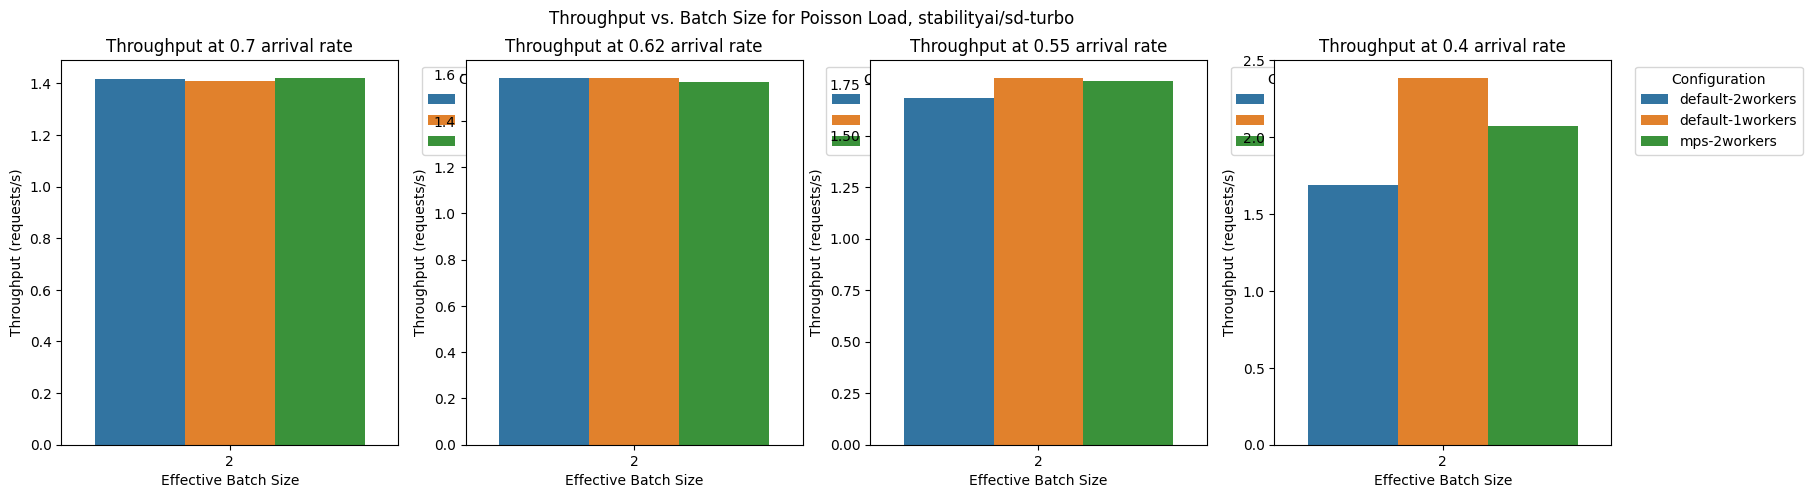

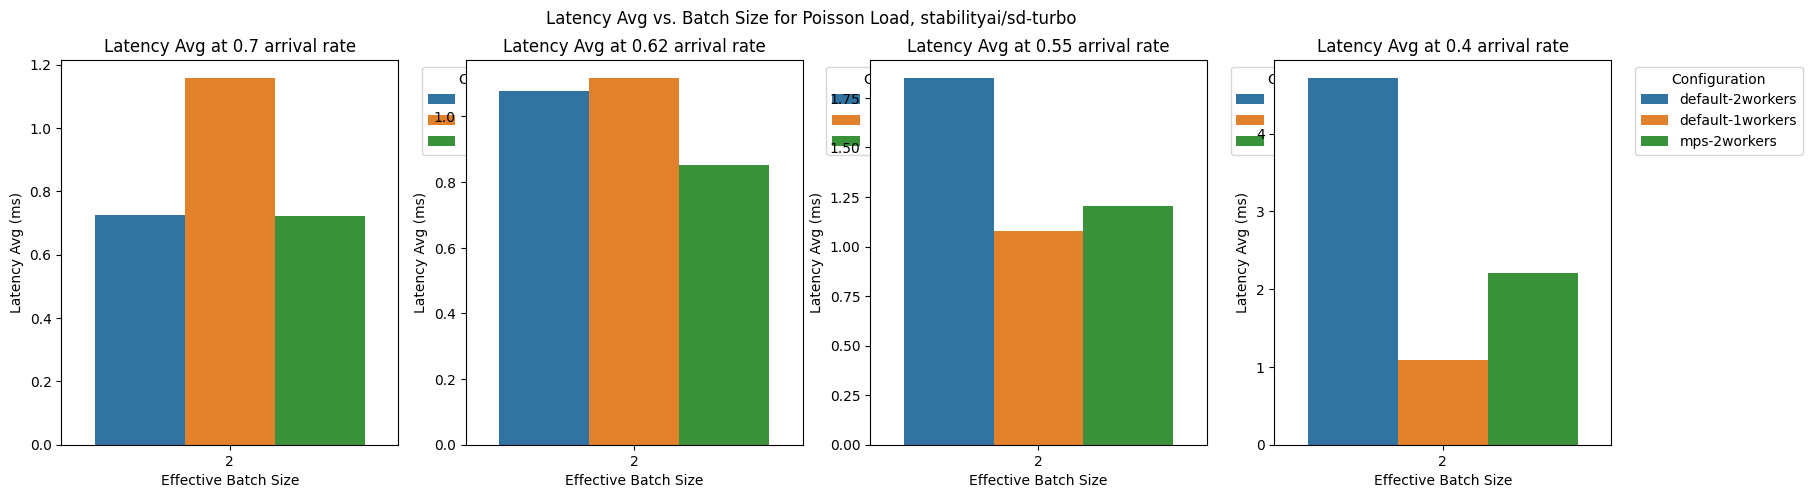

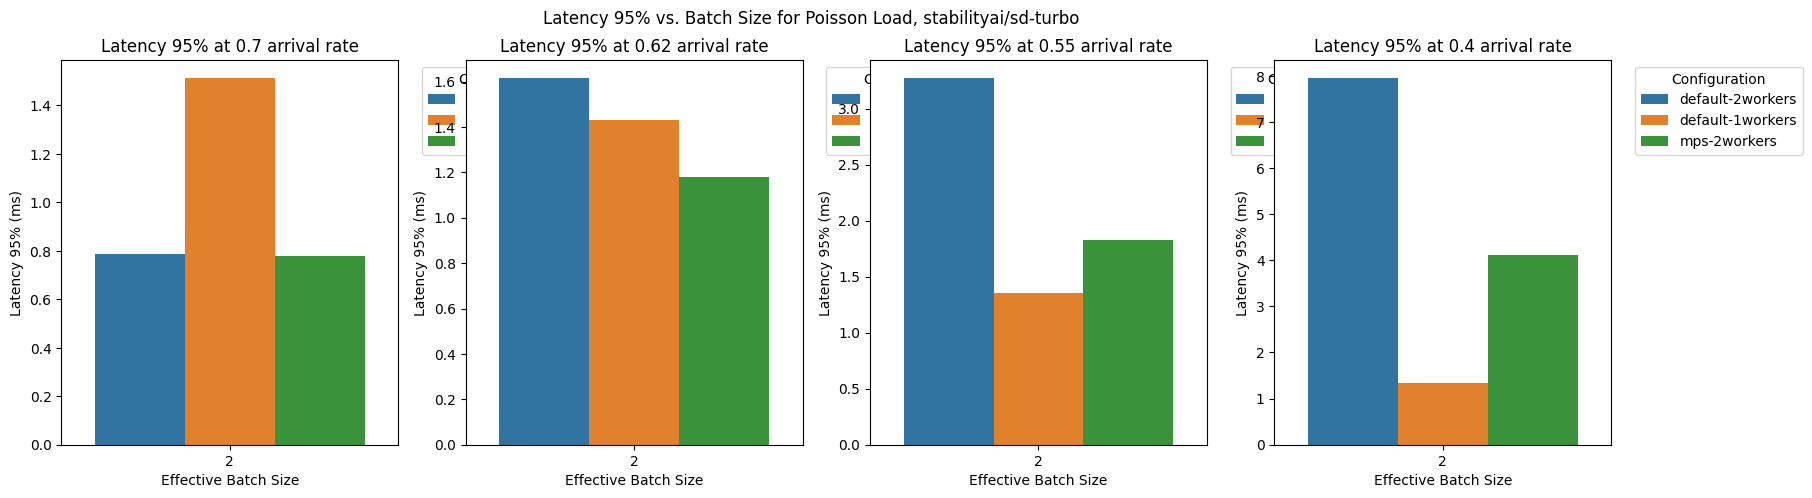

In [39]:
visualize("stabilityai/sd-turbo")